## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

## Import Data

In [2]:
data = pd.read_csv('data-logistic.csv', header=None)
data.shape

(205, 3)

In [3]:
data.head(3)

,0,1,2
0,-1,-0.663827,-0.138526
1,1,1.994596,2.468025
2,-1,-1.247395,0.749425


In [4]:
data.iloc[:, 0].value_counts() # almost equal number of classes

 1    105
-1    100
Name: 0, dtype: int64

### Separate the target variable from the features

In [5]:
y = data.iloc[:, 0]
X = data.iloc[:, [1, 2]]
X = X.values

### Gradient Descent Class realization

In [6]:
class GD_LR_2vars:
    """
    Gradient Descent realization for Logistic Regression with 2 variables without intercept
    and with l2 regularization (Ridge) (optional parameter)
 """
    
    
    def __init__(self, w_0=np.array([0, 0]), learning_rate=0.1, max_iters=10000, ostanova=1e-5, C=10):
        self.w = None # weights that will be obtained after applying "fit" method
        self.w_0 = w_0 # initial weights
        self.learning_rate =learning_rate
        self.max_iters = max_iters # maximum iterations
        self.ostanova = ostanova # euclid distance of weights' vectors between iterations
        self.C = C # regularization coefficient
        # history variables
        self.iters_list = []
        self.euclids_list = []
        self.loss_list = []
        self.w1_list = []
        self.w2_list = []
    
    
    def weights_update(self, X, y):
        # number of observations
        n = X.shape[0]
        # weights
        w1, w2 = self.w
        # variables unpacking
        x1 = X[:, 0]
        x2 = X[:, 1]
        # sums update
        sum_w1 = sum(y * x1 * (1- 1 / (1 + np.exp(-y * (w1 * x1 + w2 * x2)))))
        sum_w2 = sum(y * x2 * (1 -1 / (1 + np.exp(-y * (w1 * x1 + w2 * x2)))))
        # weights update
        w1 = w1 + self.learning_rate * (1/n * sum_w1) - self.learning_rate * self.C * w1
        w2 = w2 + self.learning_rate * (1/n * sum_w2) - self.learning_rate * self.C * w2
        new_weights = np.array([w1, w2])
        return new_weights
    
    
    def loss_compute(self, X, y):
        n = X.shape[0]
        x1 = X[:, 0]
        x2 = X[:, 1]
        w1, w2 = self.w
        return sum(np.log(1 + np.exp(-y * (w1 * x1 + w2 * x2)))) / n + 1/2 * self.C * (w1**2 + w2**2)**2
    
    
    def fit(self, X, y):
        # make it more than "ostanova" just to go inside the while loop
        euclid_distance = 99999
        # initial weights
        self.w = self.w_0
        # weights and "iteration" are set to zero only to define the variables before the loop
        new_weights, old_weights = np.array([0, 0])
        iteration = 0
        while (euclid_distance >= self.ostanova) and (iteration < self.max_iters):
            iteration += 1
            # weights update
            new_weights = gd.weights_update(X, y)    
            # euclid distance calculation
            if iteration == 0:
                euclid_distance = np.sqrt(np.sum((new_weights - self.w_0)**2))
            euclid_distance = np.sqrt(np.sum((new_weights - old_weights)**2))          
            # weights are saved for the next iteration
            old_weights = new_weights
            
            # history writing
            self.iters_list.append(iteration)
            self.w = new_weights
            self.w1_list.append(new_weights[0])
            self.w2_list.append(new_weights[1])
            self.euclids_list.append(euclid_distance)
            # loss computation
            self.loss_list.append(gd.loss_compute(X, y))

            
    def predict(self, X):
        return np.sum(X * self.w, axis=1)
    
    
    def show_history(self):
        return pd.DataFrame({'iteration':self.iters_list, 'w1':self.w1_list, 'w2':self.w2_list, 
                            'euclid_distance':self.euclids_list, 'loss': self.loss_list})
    
    
    def show_loss_history(self):
        df = gd.show_history()
        plt.figure(figsize=(14, 6))
        plt.plot(df['iteration'], df['loss'])
        plt.title('Loss by iterations')
        plt.ylabel('Loss value')
        plt.xlabel('Iteration number')

### Without regularization

In [7]:
gd = GD_LR_2vars(C=0)

In [8]:
gd.fit(X, y)

In [9]:
y_pred = gd.predict(X)

In [10]:
roc_auc_score(y, y_pred)

0.9268571428571428

In [11]:
history = gd.show_history()
history.shape

(244, 5)

In [12]:
history.head(3)

,iteration,w1,w2,euclid_distance,loss
0,1,0.035731,0.032460,0.048274,0.673091
1,2,0.062430,0.055213,0.035079,0.662263
2,3,0.083434,0.072025,0.026903,0.655757


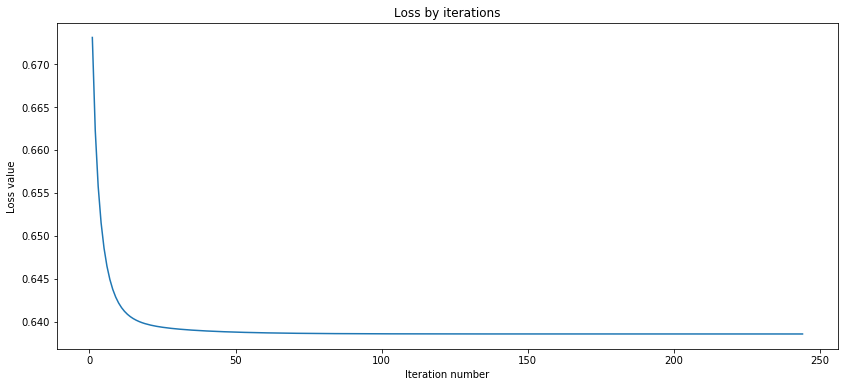

In [13]:
gd.show_loss_history()

### With regularization

In [14]:
gd = GD_LR_2vars(C=10)

In [15]:
gd.fit(X, y)

In [16]:
y_pred = gd.predict(X)

In [17]:
roc_auc_score(y, y_pred)

0.9362857142857142

In [18]:
history = gd.show_history()
history.shape

(8, 5)

In [19]:
history.head(3)

,iteration,w1,w2,euclid_distance,loss
0,1,0.035731,0.032460,0.048274,0.673119
1,2,0.026699,0.022754,0.013259,0.677949
2,3,0.029057,0.025326,0.003490,0.676631


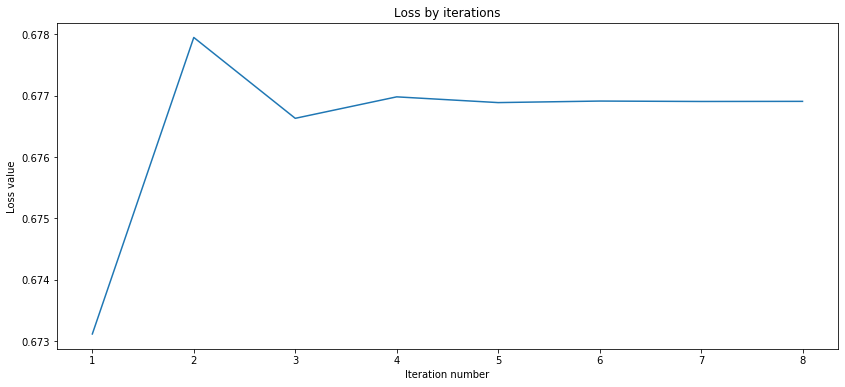

In [20]:
gd.show_loss_history()

### As it can be seen regularization (l2) increases the speed of convergence to the optimal weights and accuracy of prediction in our case ROC-AUC score